In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [4]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Brain tumor /Train",
                                                    target_size=(IMG_SIZE,IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="binary",
                                                    subset ="training"
)

Found 814 images belonging to 2 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
   "/content/drive/MyDrive/Brain tumor /Train",
                                      target_size=(IMG_SIZE,IMG_SIZE),
                                      batch_size=BATCH_SIZE,
                                      class_mode="binary",
                                      subset ="validation"
)

Found 202 images belonging to 2 classes.


In [7]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
model.fit(train_generator,epochs=2, validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 181s 7s/step - accuracy: 0.6433 - loss: 0.6904 - val_accuracy: 0.7426 - val_loss: 0.4707
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.7779 - loss: 0.4487 - val_accuracy: 0.7970 - val_loss: 0.4125


In [12]:
model.save('/content/drive/MyDrive/Brain tumor /Train.h5')

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/Brain tumor /Train.h5')
print("Model Loaded")

Model Loaded


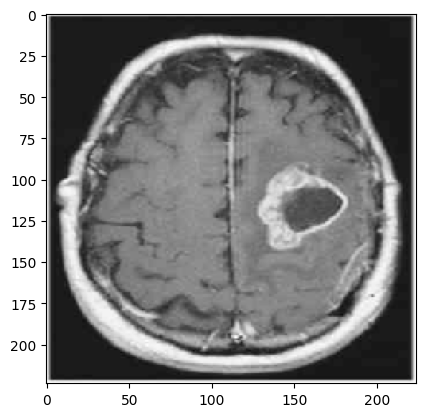

In [16]:
test_image_path='/content/drive/MyDrive/Brain tumor /Train/Yes/Y1714 (1).jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [17]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [18]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
[[0.8871909]]


In [20]:
if prediction>=0.5:
  print("Presence of Brain Tumor is detected")
else:
  print("You don't have Brain tumor")

Presence of Brain Tumor is detected
